# (1) Data Load

In [1]:
import pandas as pd
import numpy as np
# 함수 파일 import
import import_ipynb
from function_file import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
data=pd.read_csv(r"C:\Users\USER\Desktop\비만 예측 REMASTER\data\sampled_data.csv")

importing Jupyter notebook from function_file.ipynb


-     '3.feature_filterling.ipynb' 에서 만든 특성 list import

In [2]:
import pickle

# 순서 적용해서 분류한 특성 리스트
with open('total_list.pkl', 'rb') as f:
    total_list = pickle.load(f)

for i in total_list:
    print(i)

continuous_columns
['DW_WBT_BMD', 'N_INTK', 'N_EN', 'HE_wc', 'age', 'HE_wt', 'N_WATER', 'N_FAT', 'DW_WBT_pFT', 'N_CHO', 'BP8', 'HE_ht', 'N_PROT']
category_columns
['BO3_05', 'BO3_01', 'DI1_2', 'BO3_12', 'DK9_dg', 'BO3_07', 'BO2_1', 'sex', 'BO3_04', 'BO1_3', 'BO1_1', 'DI1_dg', 'BO3_09', 'BO3_03', 'BO3_02', 'fat', 'N_DIET']


In [3]:
continuous_columns= total_list[1]
category_columns=total_list[3]

# (2) Modeling

-     1. 카테고리형 변수 원핫 인코딩

In [4]:
# category_columns에서 타겟변수인 'fat'은 제외하고 원핫인코딩 리스트 생성
one_hot_list=category_columns
one_hot_list.remove('fat')
for i in one_hot_list:
    data[i] = data[i].astype(str)

In [5]:
# 원핫인코딩 적용한 데이터 프레임
encoded_data=pd.get_dummies(data[one_hot_list])

-     2. 연속형 변수 min_max_scaling 

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 선택한 컬럼들에 Min-Max Scaling 적용
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

In [7]:
# 원핫인코딩한 데이터프레임, 연속형특성 데이터프레임, 타겟변수 데이터프레임 병합
data=pd.concat((encoded_data, data[continuous_columns], data['fat']), axis=1)

-     3. 모델링 

In [8]:
y = data['fat']
X = data.drop(['fat', 'DW_WBT_pFT','DW_WBT_BMD'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# 모델 객체
rf_classifier = RandomForestClassifier()

# 모델 훈련
rf_classifier.fit(X_train, y_train)

# 예측값
y_pred = rf_classifier.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# f1 스코어
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 스코어:", f1)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.5419354838709678
F1 스코어: 0.539681144535632
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       413
           1       0.42      0.39      0.40       413
           2       0.58      0.60      0.59       414

    accuracy                           0.54      1240
   macro avg       0.54      0.54      0.54      1240
weighted avg       0.54      0.54      0.54      1240



['HE_wc', 'HE_wt', 'HE_ht', 'N_CHO', 'N_FAT', 'age', 'N_EN', 'N_PROT', 'N_INTK', 'N_WATER', 'BP8', 'N_DIET_2.0', 'N_DIET_1.0', 'BO1_1_1.0', 'sex_1.0', 'sex_2.0', 'BO1_1_2.0', 'BO2_1_1.0', 'BO1_1_3.0', 'BO3_03_1.0', 'BO3_03_0.0', 'BO1_3_8.0', 'BO3_01_1.0', 'BO3_01_0.0', 'DI1_2_1.0', 'DI1_2_8.0', 'BO1_3_1.0', 'BO2_1_2.0', 'DI1_dg_1.0', 'BO2_1_3.0']


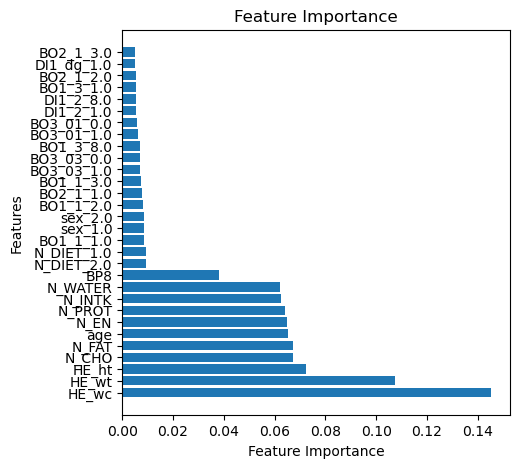

In [11]:
feature_importance(rf_classifier, X_train, 30)

-------
번외로 딥러닝까지 진행함

In [12]:
from keras.utils import np_utils
y_encoded=np_utils.to_categorical(y)
print(y_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [13]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(16, input_dim=len(X.columns), activation='relu'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X, y_encoded, epochs=50, batch_size=1)

Epoch 1/50
4131/4131 [==============================] - 3s 670us/step - loss: 1.0370 - accuracy: 0.4558
Epoch 2/50
4131/4131 [==============================] - 3s 729us/step - loss: 0.9685 - accuracy: 0.5064
Epoch 3/50
4131/4131 [==============================] - 3s 786us/step - loss: 0.9387 - accuracy: 0.5323
Epoch 4/50
4131/4131 [==============================] - 3s 721us/step - loss: 0.9202 - accuracy: 0.5468
Epoch 5/50
4131/4131 [==============================] - 3s 718us/step - loss: 0.9155 - accuracy: 0.5427
Epoch 6/50
4131/4131 [==============================] - 3s 829us/step - loss: 0.9073 - accuracy: 0.5500
Epoch 7/50
4131/4131 [==============================] - 3s 716us/step - loss: 0.9026 - accuracy: 0.5418
Epoch 8/50
4131/4131 [==============================] - 4s 872us/step - loss: 0.8988 - accuracy: 0.5611
Epoch 9/50
4131/4131 [==============================] - 4s 1ms/step - loss: 0.8971 - accuracy: 0.5621
Epoch 10/50
4131/4131 [==============================] - 5s 1ms/st